## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv('../dataset/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Dataset Understanding

In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
df.dtypes[df.dtypes == object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

**Calculate the value counts of the object data type columns**

In [7]:
df.Fuel_Type.value_counts(normalize=True)

Petrol    0.794020
Diesel    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [8]:
df.Seller_Type.value_counts(normalize=True)

Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

In [9]:
df.Transmission.value_counts(normalize=True)

Manual       0.86711
Automatic    0.13289
Name: Transmission, dtype: float64

**Create a new column named no_of_years that stores difference between the current year and car's buying year**

In [10]:
from datetime import date
df['Current_Year'] = date.today().year
df['Number_Of_Years'] = df['Current_Year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


**Dropping unwanted columns from the DataFrame**

In [11]:
df.drop(['Car_Name','Year','Current_Year'],axis = 1,inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


**Checking For Missing Values**

In [12]:
df.isna().sum()

Selling_Price      0
Present_Price      0
Kms_Driven         0
Fuel_Type          0
Seller_Type        0
Transmission       0
Owner              0
Number_Of_Years    0
dtype: int64

In [13]:
df.notna().sum()

Selling_Price      301
Present_Price      301
Kms_Driven         301
Fuel_Type          301
Seller_Type        301
Transmission       301
Owner              301
Number_Of_Years    301
dtype: int64

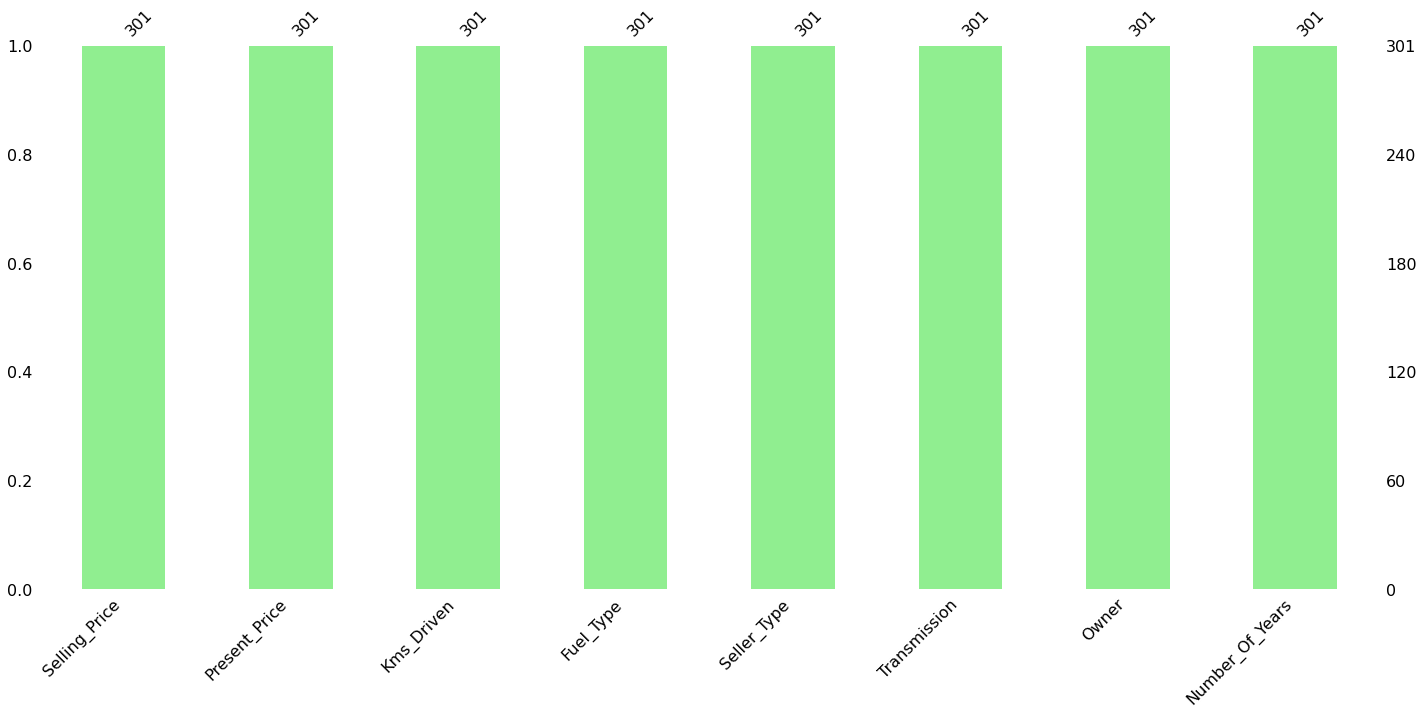

In [14]:
msno.bar(df, color="lightgreen")
plt.show()

**Summary statistics of the DataFrame** 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Number_Of_Years,301.0,7.372093,2.891554,3.00,5.0,7.0,9.0,18.0
